$$
AnalisisRiesgo
$$

In [ ]:
pip install --upgrade yfinance


## Analisis financiero por Empresa

In [163]:
# Importar librerias necesarias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### Apple

In [164]:
# obtener datos historicos de Apple los ultimos 30 dias
msft = yf.Ticker("AAPL")
hist = msft.history(period="1mo")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

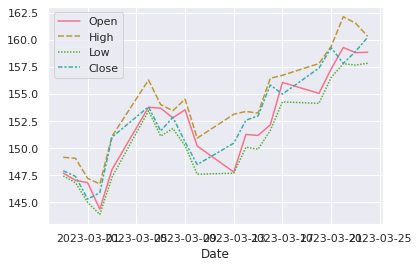

In [165]:
apple = yf.download("AAPL", period="1mo")
apple = apple[['Open', 'High', 'Low', 'Close']]

sns.set_style("darkgrid")
sns.set_palette("husl")
sns.lineplot(data=apple)

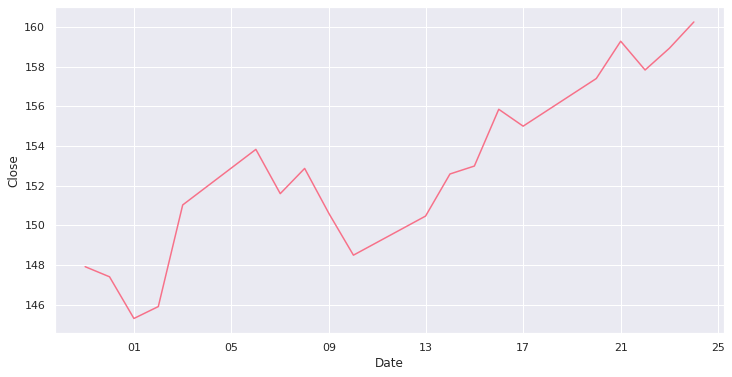

In [166]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Obtener datos históricos de Apple ultimos 30 dias
msft = yf.Ticker("AAPL")
hist = msft.history(period="1mo")

# Configurar gráfica con Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=hist.index, y=hist["Close"], ax=ax)

# Configurar formato del eje x
date_fmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(date_fmt)

# Mostrar gráfica
plt.show()


## KPI - volatilidad (apple)

In [167]:
import pandas as pd
import yfinance as yf

# Descargar los datos históricos de Apple y el índice SP500
apple = yf.download("AAPL", period="30d")
sp500 = yf.download("^GSPC", period="30d")

# Calcular las variaciones porcentuales diarias
apple_returns = apple["Close"].pct_change()
sp500_returns = sp500["Close"].pct_change()

# Calcular la volatilidad de las acciones de Apple y del índice SP500
apple_volatility = apple_returns.std() * (252 ** 0.5) # 252 es el número de días de negociación en un año
sp500_volatility = sp500_returns.std() * (252 ** 0.5)

# Imprimir los resultados
print("Volatilidad de las acciones de Apple en los últimos 30 días: {:.2f}%".format(apple_volatility*100))
print("Volatilidad del índice SP500 en los últimos 30 días: {:.2f}%".format(sp500_volatility*100))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Volatilidad de las acciones de Apple en los últimos 30 días: 22.38%
Volatilidad del índice SP500 en los últimos 30 días: 17.27%


## Se recomienda entre 10% al 20% de volatilidad 

###  KPi - Margen bruto de beneficios (APPLE)

<Axes: xlabel='Date'>

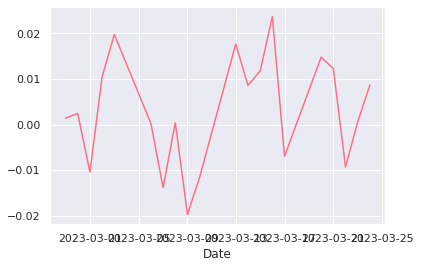

In [168]:
import yfinance as yf

apple = yf.Ticker("AAPL")
historical_data = apple.history(period="1mo")

ingresos_totales = historical_data["Close"] * historical_data["Volume"]
costo_bienes_vendidos = historical_data["Open"] * historical_data["Volume"]

margen_beneficio_bruto = (ingresos_totales - costo_bienes_vendidos) / ingresos_totales

import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(x=historical_data.index, y=margen_beneficio_bruto)


### KPI - ingreso medio por usuario (Apple)

<Axes: xlabel='Date'>

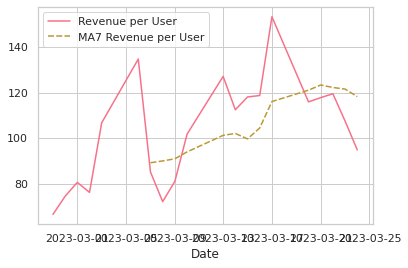

In [169]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Obtener los datos de Amazon
apple = yf.Ticker("AAPL")

# Obtener los datos históricos de los últimos 30 días
hist = apple.history(period="1mo")

# Calcular los ingresos diarios
hist['Daily Revenue'] = hist['Close'] * hist['Volume']

# Obtener el número de usuarios promedio (se utiliza el valor de 100 millones como ejemplo)
num_users = 100000000

# Calcular los ingresos medios por usuario
hist['Revenue per User'] = hist['Daily Revenue'] / num_users

# Calcular la media móvil de los ingresos medios por usuario en un periodo de 7 días
hist['MA7 Revenue per User'] = hist['Revenue per User'].rolling(window=7).mean()

# Graficar los ingresos medios por usuario y su media móvil
sns.set_style('whitegrid')
sns.lineplot(data=hist[['Revenue per User', 'MA7 Revenue per User']])


El KPI de "Ingresos medios por usuario" puede ser un indicador de la prosperidad de una empresa como Amazon si muestra un aumento constante a lo largo del tiempo. Si el ingreso promedio por usuario de la empresa ha aumentado, significa que ha logrado aumentar su base de clientes, ha mejorado la satisfacción y fidelidad del cliente, y/o ha logrado aumentar los ingresos por venta. Si este KPI se mantiene constante o disminuye, podría indicar que la empresa está teniendo dificultades para atraer y retener a los clientes, o que está experimentando una disminución en los ingresos por venta. Por lo tanto, un aumento constante en los ingresos medios por usuario puede interpretarse como un resultado positivo para la empresa.

### Google

In [170]:
# obtener datos historicos de GOOGLE los ultimos 30 dias
google = yf.Ticker("GOOGL")
hist = msft.history(period="1mo")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


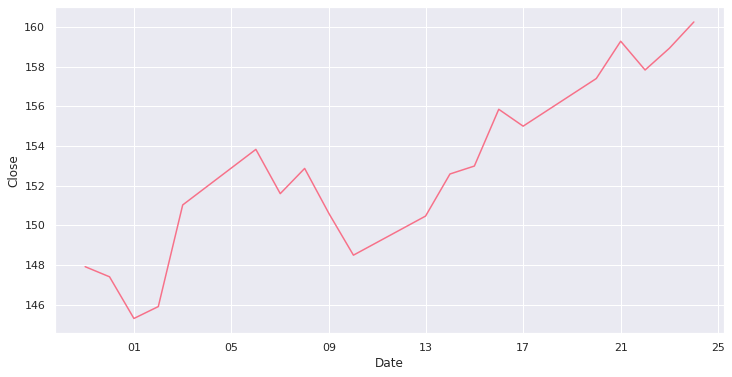

In [171]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Obtener datos históricos de GOOGLE ultimos 30 dias
google = yf.Ticker("GOOGL")
hist = msft.history(period="1mo")

# Configurar gráfica con Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=hist.index, y=hist["Close"], ax=ax)

# Configurar formato del eje x
date_fmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(date_fmt)

# Mostrar gráfica
plt.show()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

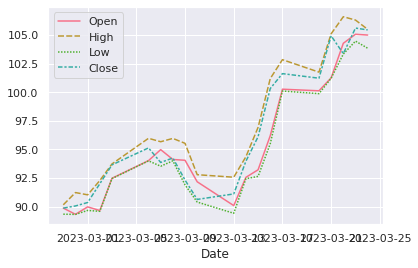

In [172]:
import yfinance as yf
import seaborn as sns

googl = yf.download("GOOGL", period="1mo")
googl = googl[['Open', 'High', 'Low', 'Close']]

sns.set_style("darkgrid")
sns.set_palette("husl")
sns.lineplot(data=googl)


### KPI - volatilidad (google)

In [173]:
# Descargar los datos históricos de google y el índice SP500
google = yf.download("GOOGL", period="30d")
sp500 = yf.download("^GSPC", period="30d")

# Calcular las variaciones porcentuales diarias
google_returns = google["Close"].pct_change()
sp500_returns = sp500["Close"].pct_change()

# Calcular la volatilidad de las acciones de google y del índice SP500
google_volatility = google_returns.std() * (252 ** 0.5) # 252 es el número de días de negociación en un año
sp500_volatility = sp500_returns.std() * (252 ** 0.5)

# Imprimir los resultados
print("Volatilidad de las acciones de google en los últimos 30 días: {:.2f}%".format(google_volatility*100))
print("Volatilidad del índice SP500 en los últimos 30 días: {:.2f}%".format(sp500_volatility*100))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Volatilidad de las acciones de google en los últimos 30 días: 28.88%
Volatilidad del índice SP500 en los últimos 30 días: 17.27%


###  KPi - Margen bruto de beneficios (google)

<Axes: xlabel='Date'>

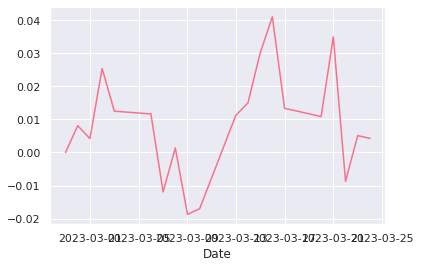

In [174]:
import yfinance as yf

google = yf.Ticker("GOOGL")
historical_data = google.history(period="1mo")

ingresos_totales = historical_data["Close"] * historical_data["Volume"]
costo_bienes_vendidos = historical_data["Open"] * historical_data["Volume"]

margen_beneficio_bruto = (ingresos_totales - costo_bienes_vendidos) / ingresos_totales

import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(x=historical_data.index, y=margen_beneficio_bruto)

### KPI  - Ingresos medios por usuario (google)

<Axes: xlabel='Date'>

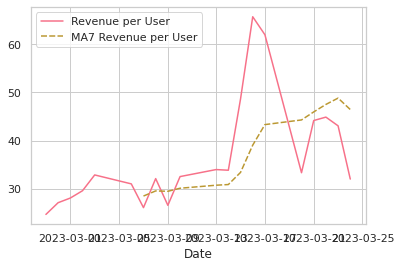

In [175]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Obtener los datos de google
google = yf.Ticker("GOOGL")

# Obtener los datos históricos de los últimos 30 días
hist = google.history(period="1mo")

# Calcular los ingresos diarios
hist['Daily Revenue'] = hist['Close'] * hist['Volume']

# Obtener el número de usuarios promedio (se utiliza el valor de 100 millones como ejemplo)
num_users = 100000000

# Calcular los ingresos medios por usuario
hist['Revenue per User'] = hist['Daily Revenue'] / num_users

# Calcular la media móvil de los ingresos medios por usuario en un periodo de 7 días
hist['MA7 Revenue per User'] = hist['Revenue per User'].rolling(window=7).mean()

# Graficar los ingresos medios por usuario y su media móvil
sns.set_style('whitegrid')
sns.lineplot(data=hist[['Revenue per User', 'MA7 Revenue per User']])


El KPI de "Ingresos medios por usuario" puede ser un indicador de la prosperidad de una empresa como Amazon si muestra un aumento constante a lo largo del tiempo. Si el ingreso promedio por usuario de la empresa ha aumentado, significa que ha logrado aumentar su base de clientes, ha mejorado la satisfacción y fidelidad del cliente, y/o ha logrado aumentar los ingresos por venta. Si este KPI se mantiene constante o disminuye, podría indicar que la empresa está teniendo dificultades para atraer y retener a los clientes, o que está experimentando una disminución en los ingresos por venta. Por lo tanto, un aumento constante en los ingresos medios por usuario puede interpretarse como un resultado positivo para la empresa.

### Amazon

In [176]:
# obtener datos historicos de AMAZON los ultimos 30 dias
amzn = yf.Ticker("amzn")
hist = msft.history(period="1mo")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


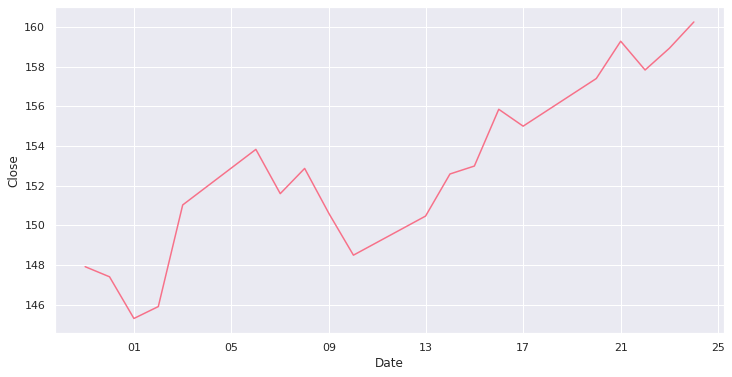

In [177]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Obtener datos históricos de Amazon ultimos 30 dias
amzn = yf.Ticker("AMZN")
hist = msft.history(period="1mo")

# Configurar gráfica con Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=hist.index, y=hist["Close"], ax=ax)

# Configurar formato del eje x
date_fmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(date_fmt)

# Mostrar gráfica
plt.show()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

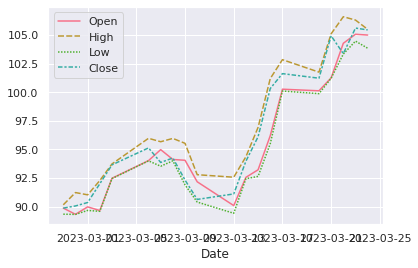

In [178]:
import yfinance as yf
import seaborn as sns

amzn = yf.download("AMZN", period="1mo")
amzn = googl[['Open', 'High', 'Low', 'Close']]

sns.set_style("darkgrid")
sns.set_palette("husl")
sns.lineplot(data=amzn)

### KPI - volatilidad (amazon)

In [179]:
# Descargar los datos históricos de amazon y el índice SP500
AMAZON = yf.download("AMZN", period="30d")
sp500 = yf.download("^GSPC", period="30d")

# Calcular las variaciones porcentuales diarias
AMAZON_returns = AMAZON["Close"].pct_change()
sp500_returns = sp500["Close"].pct_change()

# Calcular la volatilidad de las acciones de AMAZON y del índice SP500
AMAZON_volatility = AMAZON_returns.std() * (252 ** 0.5) # 252 es el número de días de negociación en un año
sp500_volatility = sp500_returns.std() * (252 ** 0.5)

# Imprimir los resultados
print("Volatilidad de las acciones de amazon en los últimos 30 días: {:.2f}%".format(AMAZON_volatility*100))
print("Volatilidad del índice SP500 en los últimos 30 días: {:.2f}%".format(sp500_volatility*100))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Volatilidad de las acciones de amazon en los últimos 30 días: 29.43%
Volatilidad del índice SP500 en los últimos 30 días: 17.27%


### KPI - - Margen bruto de beneficios (amazon)

<Axes: xlabel='Date'>

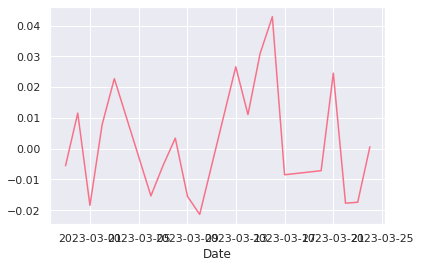

In [180]:
import yfinance as yf

amazon = yf.Ticker("AMZN")
historical_data = amazon.history(period="1mo")

ingresos_totales = historical_data["Close"] * historical_data["Volume"]
costo_bienes_vendidos = historical_data["Open"] * historical_data["Volume"]

margen_beneficio_bruto = (ingresos_totales - costo_bienes_vendidos) / ingresos_totales

import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(x=historical_data.index, y=margen_beneficio_bruto)

### KPI  - Ingresos medios por usuario (amazon)

Este código obtiene los datos de Amazon utilizando yfinance, calcula los ingresos diarios multiplicando el precio de cierre por el volumen, calcula los ingresos medios por usuario dividiendo los ingresos diarios por el número de usuarios y calcula la media móvil de los ingresos medios por usuario en un periodo de 7 días. Finalmente, grafica los ingresos medios por usuario y su media móvil utilizando seaborn.

<Axes: xlabel='Date'>

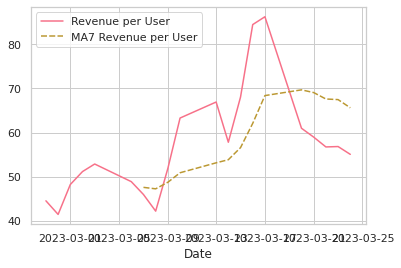

In [181]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Obtener los datos de Amazon
amzn = yf.Ticker("AMZN")

# Obtener los datos históricos de los últimos 30 días
hist = amzn.history(period="1mo")

# Calcular los ingresos diarios
hist['Daily Revenue'] = hist['Close'] * hist['Volume']

# Obtener el número de usuarios promedio (se utiliza el valor de 100 millones como ejemplo)
num_users = 100000000

# Calcular los ingresos medios por usuario
hist['Revenue per User'] = hist['Daily Revenue'] / num_users

# Calcular la media móvil de los ingresos medios por usuario en un periodo de 7 días
hist['MA7 Revenue per User'] = hist['Revenue per User'].rolling(window=7).mean()

# Graficar los ingresos medios por usuario y su media móvil
sns.set_style('whitegrid')
sns.lineplot(data=hist[['Revenue per User', 'MA7 Revenue per User']])


El KPI de "Ingresos medios por usuario" puede ser un indicador de la prosperidad de una empresa como Amazon si muestra un aumento constante a lo largo del tiempo. Si el ingreso promedio por usuario de la empresa ha aumentado, significa que ha logrado aumentar su base de clientes, ha mejorado la satisfacción y fidelidad del cliente, y/o ha logrado aumentar los ingresos por venta. Si este KPI se mantiene constante o disminuye, podría indicar que la empresa está teniendo dificultades para atraer y retener a los clientes, o que está experimentando una disminución en los ingresos por venta. Por lo tanto, un aumento constante en los ingresos medios por usuario puede interpretarse como un resultado positivo para la empresa.

### Microsoft

In [182]:
# obtener datos historicos de AMAZON los ultimos 30 dias
microsoft = yf.Ticker("msft")
hist = msft.history(period="1mo")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


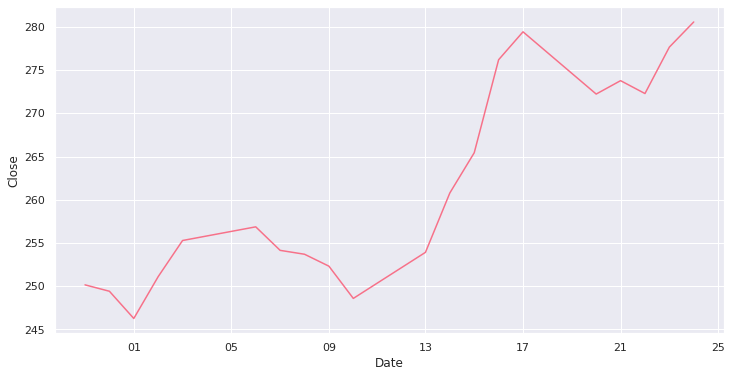

In [183]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Obtener datos históricos de Microsoft ultimos 30 dias
microsoft = yf.Ticker("msft")
hist = microsoft.history(period="1mo")

# Configurar gráfica con Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=hist.index, y=hist["Close"], ax=ax)

# Configurar formato del eje x
date_fmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(date_fmt)

# Mostrar gráfica
plt.show()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

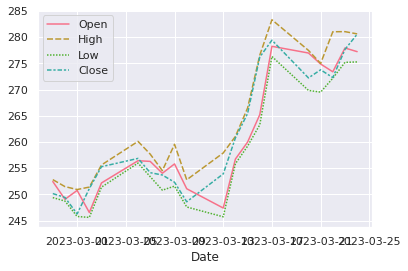

In [184]:
import yfinance as yf
import seaborn as sns

microsoft = yf.download("msft", period="1mo")
microsoft = microsoft[['Open', 'High', 'Low', 'Close']]

sns.set_style("darkgrid")
sns.set_palette("husl")
sns.lineplot(data=microsoft)

### KPI - volatilidad (microsoft)

In [185]:
# Descargar los datos históricos de microsoft y el índice SP500
microsoft = yf.download("msft", period="30d")
sp500 = yf.download("^GSPC", period="30d")

# Calcular las variaciones porcentuales diarias
microsoft_returns = microsoft["Close"].pct_change()
sp500_returns = sp500["Close"].pct_change()

# Calcular la volatilidad de las acciones de microsoft y del índice SP500
microsoft_volatility = microsoft_returns.std() * (252 ** 0.5) # 252 es el número de días de negociación en un año
sp500_volatility = sp500_returns.std() * (252 ** 0.5)

# Imprimir los resultados
print("Volatilidad de las acciones de microsoft en los últimos 30 días: {:.2f}%".format(microsoft_volatility*100))
print("Volatilidad del índice SP500 en los últimos 30 días: {:.2f}%".format(sp500_volatility*100))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Volatilidad de las acciones de microsoft en los últimos 30 días: 28.06%
Volatilidad del índice SP500 en los últimos 30 días: 17.27%


### KPI - - Margen bruto de beneficios (microsoft)

<Axes: xlabel='Date'>

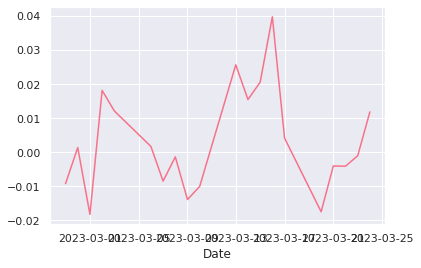

In [186]:
import yfinance as yf

microsoft = yf.Ticker("msft")
historical_data = microsoft.history(period="1mo")

ingresos_totales = historical_data["Close"] * historical_data["Volume"]
costo_bienes_vendidos = historical_data["Open"] * historical_data["Volume"]

margen_beneficio_bruto = (ingresos_totales - costo_bienes_vendidos) / ingresos_totales

import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(x=historical_data.index, y=margen_beneficio_bruto)

### KPI - Ingresos medios por usuarios (Microsoft)

<Axes: xlabel='Date'>

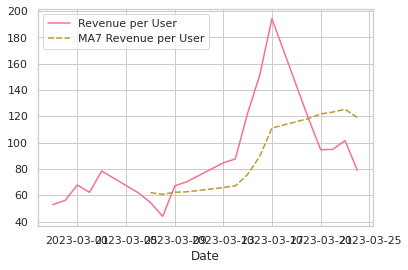

In [187]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Obtener los datos de Microsoft
microsoft = yf.Ticker("msft")

# Obtener los datos históricos de los últimos 30 días
hist = microsoft.history(period="1mo")

# Calcular los ingresos diarios
hist['Daily Revenue'] = hist['Close'] * hist['Volume']

# Obtener el número de usuarios promedio (se utiliza el valor de 100 millones como ejemplo)
num_users = 100000000

# Calcular los ingresos medios por usuario
hist['Revenue per User'] = hist['Daily Revenue'] / num_users

# Calcular la media móvil de los ingresos medios por usuario en un periodo de 7 días
hist['MA7 Revenue per User'] = hist['Revenue per User'].rolling(window=7).mean()

# Graficar los ingresos medios por usuario y su media móvil
sns.set_style('whitegrid')
sns.lineplot(data=hist[['Revenue per User', 'MA7 Revenue per User']])


El KPI de "Ingresos medios por usuario" puede ser un indicador de la prosperidad de una empresa como Amazon si muestra un aumento constante a lo largo del tiempo. Si el ingreso promedio por usuario de la empresa ha aumentado, significa que ha logrado aumentar su base de clientes, ha mejorado la satisfacción y fidelidad del cliente, y/o ha logrado aumentar los ingresos por venta. Si este KPI se mantiene constante o disminuye, podría indicar que la empresa está teniendo dificultades para atraer y retener a los clientes, o que está experimentando una disminución en los ingresos por venta. Por lo tanto, un aumento constante en los ingresos medios por usuario puede interpretarse como un resultado positivo para la empresa.

## Comparativa de las empresas juntas

[*********************100%***********************]  4 of 4 completed


<Figure size 720x360 with 0 Axes>

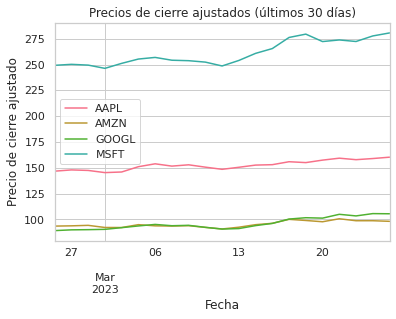

In [188]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Definir el símbolo de la empresa que se desea extraer
symbols = ['AAPL', 'MSFT', 'AMZN', 'googl']

# Definir la fecha de inicio (hace 30 días)
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")

# Extraer los datos de la empresa utilizando yfinance
data = yf.download(symbols, start=start_date, end=datetime.now().strftime("%Y-%m-%d"))

# Seleccionar solo los precios de cierre ajustados
adj_close = data['Adj Close']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar los precios de cierre ajustados
adj_close.plot()

# Configurar el título y las etiquetas de los ejes
plt.title('Precios de cierre ajustados (últimos 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mostrar la gráfica
plt.show()
